# 03 - Test some basic Pandas dataframe operations

This notebook tests some basic Pandas operations directly from [GitHub.dev](https://github.dev) console using Python in the browser directly 😍

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Let's create some super simple Pandas Dataframe to play with. I'm going to add some benchmarks for the following:

* creating additional columns,
* getting some stats on columns like mean, or median, sum etc.,
* returning unique values,
* sorting a column.

Approach inspired by [Pandas benchmarks](https://github.com/mm-mansour/Fast-Pandas). Check it out, really nicely done!

In [ ]:
def generate_df(range=1000, size=10000, column_names=['ColumnA', 'ColumnB']):
    return pd.DataFrame(np.random.randint(1, range, (size, len(column_names))), columns=column_names)

In [9]:
sample_df = generate_df()
sample_df.describe()

,ColumnA,ColumnB
count,10000.000000,10000.000000
mean,494.637700,497.342300
std,287.288569,290.134815
min,1.000000,1.000000
25%,244.750000,246.000000
50%,492.000000,496.000000
75%,741.000000,749.000000
max,999.000000,999.000000


A sample function to create a benchmark fo a given set of functions to be run on a DataFrame:

* Calculate results for every function in a given set of functions.
* Draw a chart with results.

This function was designed with simplicity and readability first, so everybody can understand how benchmarking works in this case. Yes, it can be optimised for more serious use.

In [ ]:
import timeit, functools

def run_benchmarks(df_generator, functions_to_evaluate, title, df_size_power=4, no_of_runs=5, no_of_samples=1000):
    """
    Params:
    ----------
    df_generator: function, function generating a sample dataframe.
    functions_to_evaluate: List[function], a list of functions to be evaluated.
    title: string, used for visualisations only.
    no_of_runs: int, number of runs for timeit.repeat.
    no_of_samples: int, number of iterations for each run in timeit.repeat.
    """

    benchmarking_results = []
    df_sizes = [10 ** x for x in range(1, df_size_power + 1)]

    # Running benchmarks
    for df_size in df_sizes:
        print(f'Calculating results for DataFrames with a size of {df_size}.')

        for func in functions_to_evaluate:
            function_name = func.__name__
            df = df_generator(size=df_size)

            t = timeit.Timer(functools.partial(func, df))
            results = t.repeat(no_of_runs, no_of_samples)
            final_result = np.sum(results) / len(results)
            
            benchmarking_results.append({'function': function_name, 'df_size': df_size, 'result': final_result})

    benchmarking_df = pd.DataFrame(benchmarking_results)

    # Drawing a final chart
    for func in functions_to_evaluate:
        function_name = func.__name__
        x = df_sizes
        y = benchmarking_df.loc[benchmarking_df['function'] == function_name, 'result'].values
        plt.plot(x, y, marker="o", label=function_name)
    
    plt.ylabel('Benchmarked function execution time [s]')
    plt.xscale('log')
    plt.xlabel('Length of a DataFrame')
    plt.title(title)
    plt.legend()
    plt.show()

### 1. Calculating sums of a column in a DataFrame

Calculating results for DataFrames with a size of 10.
Calculating results for DataFrames with a size of 100.
Calculating results for DataFrames with a size of 1000.
Calculating results for DataFrames with a size of 10000.
Calculating results for DataFrames with a size of 100000.
Calculating results for DataFrames with a size of 1000000.


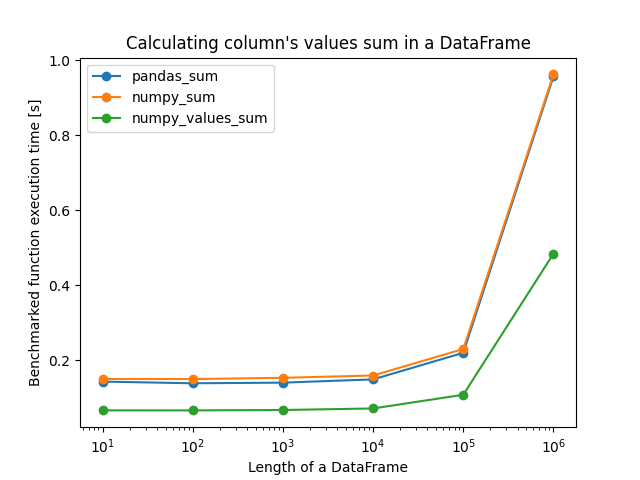

In [ ]:
def pandas_sum(df):
    return df.iloc[:, 0].sum()


def numpy_sum(df):
    return np.sum(df.iloc[:, 0])


def numpy_values_sum(df):
    return np.sum(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_sum, numpy_sum, numpy_values_sum],
    title="Calculating column's values sum in a DataFrame",
    df_size_power=6
)

### 2. Calculating median of a column in a DataFrame

Calculating results for DataFrames with a size of 10.
Calculating results for DataFrames with a size of 100.
Calculating results for DataFrames with a size of 1000.
Calculating results for DataFrames with a size of 10000.
Calculating results for DataFrames with a size of 100000.
Calculating results for DataFrames with a size of 1000000.


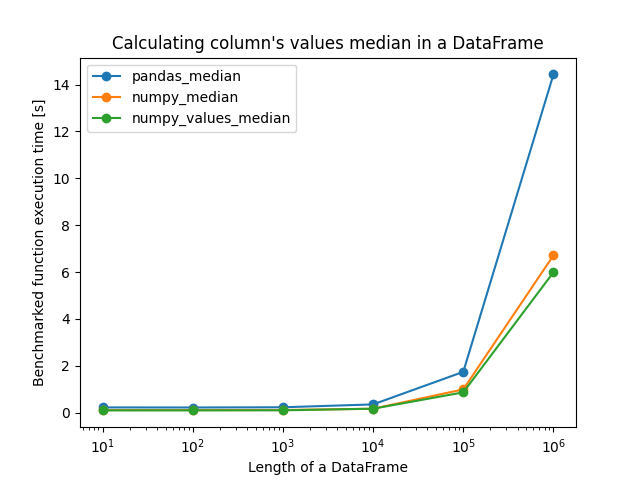

In [ ]:
def pandas_median(df):
    return df.iloc[:, 0].median()


def numpy_median(df):
    return np.median(df.iloc[:, 0])


def numpy_values_median(df):
    return np.median(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_median, numpy_median, numpy_values_median],
    title="Calculating column's values median in a DataFrame",
    df_size_power=6
)

### 3. Dropping duplicates

Calculating results for DataFrames with a size of 10.
Calculating results for DataFrames with a size of 100.
Calculating results for DataFrames with a size of 1000.
Calculating results for DataFrames with a size of 10000.
Calculating results for DataFrames with a size of 100000.
Calculating results for DataFrames with a size of 1000000.


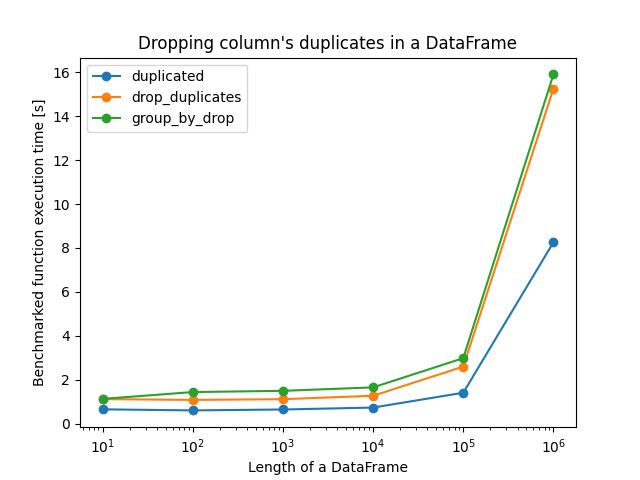

In [ ]:
def duplicated(df):
    return df[~df.iloc[:, 0].duplicated(keep="first")].reset_index(drop=True)


def drop_duplicates(df):
    subset_column = df.columns[0]
    return df.drop_duplicates(subset=subset_column, keep="first").reset_index(drop=True)


def group_by_drop(df):
    return df.groupby(df.iloc[:, 0], as_index=False, sort=False).first()


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[duplicated, drop_duplicates, group_by_drop],
    title="Dropping column's duplicates in a DataFrame",
    df_size_power=6
)

### 4. Getting unique values

Calculating results for DataFrames with a size of 10.
Calculating results for DataFrames with a size of 100.
Calculating results for DataFrames with a size of 1000.
Calculating results for DataFrames with a size of 10000.
Calculating results for DataFrames with a size of 100000.
Calculating results for DataFrames with a size of 1000000.


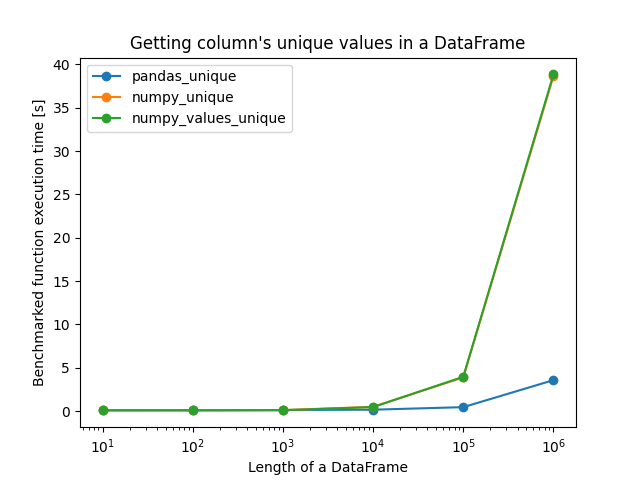

In [ ]:
def pandas_unique(df):
    return df.iloc[:, 0].unique()


def numpy_unique(df):
    return np.unique(df.iloc[:, 0])


def numpy_values_unique(df):
    return np.unique(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_unique, numpy_unique, numpy_values_unique],
    title="Getting column's unique values in a DataFrame",
    df_size_power=6
)

### 5. Sorting a column

Calculating results for DataFrames with a size of 10.
Calculating results for DataFrames with a size of 100.
Calculating results for DataFrames with a size of 1000.
Calculating results for DataFrames with a size of 10000.
Calculating results for DataFrames with a size of 100000.
Calculating results for DataFrames with a size of 1000000.


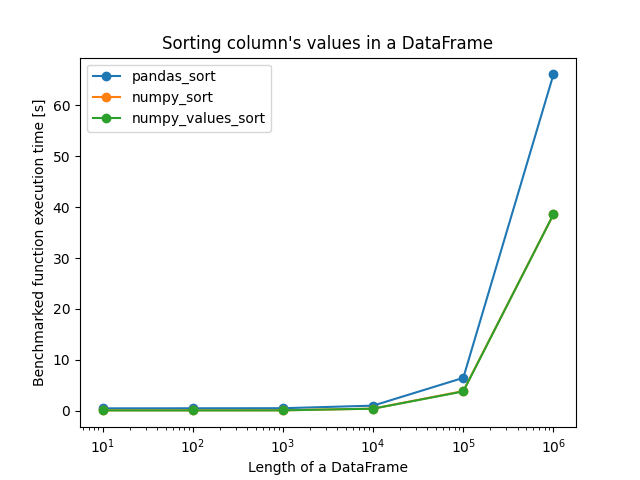

In [ ]:
def pandas_sort(df):
    return df.iloc[:, 0].sort_values()


def numpy_sort(df):
    return np.sort(df.iloc[:, 0])


def numpy_values_sort(df):
    return np.sort(df.iloc[:, 0].values)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[pandas_sort, numpy_sort, numpy_values_sort],
    title="Sorting column's values in a DataFrame",
    df_size_power=6
)

### 5. Calculating a new column based on existing ones

Calculating results for DataFrames with a size of 10.
Calculating results for DataFrames with a size of 100.
Calculating results for DataFrames with a size of 1000.
Calculating results for DataFrames with a size of 10000.
Calculating results for DataFrames with a size of 100000.
Calculating results for DataFrames with a size of 1000000.


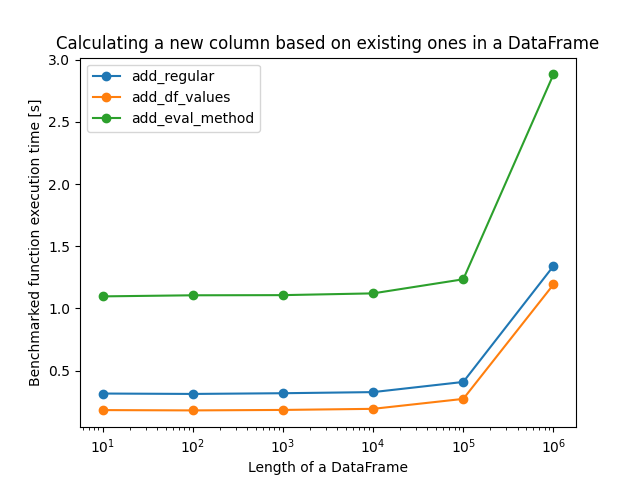

In [ ]:
def add_regular(df):
    df["ExtraColumn"] = df.iloc[:, 0] * df.iloc[:, 1]


def add_df_values(df):
    df["ExtraColumn"] = df.iloc[:, 0].values * df.iloc[:, 1].values


def add_eval_method(df):
    df.eval("ExtraColumn = ColumnA * ColumnB", inplace=True)


run_benchmarks(
    df_generator=generate_df,
    functions_to_evaluate=[add_regular, add_df_values, add_eval_method],
    title="Calculating a new column based on existing ones in a DataFrame",
    df_size_power=6
)